In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

### Probability Ration encoding means we can use this technique with target variable only and also target varable should be binary 

In [3]:
df = pd.read_csv("./titanic.csv" , usecols = ['Cabin','Embarked','Survived'])

In [4]:
df.head()

,Survived,Cabin,Embarked
0,0,NaN,Q
1,1,NaN,S
2,0,NaN,Q
3,0,NaN,S
4,1,NaN,S


In [6]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [86]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [87]:
df['Cabin'].unique()

array(['n', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [88]:
df.head()

,Survived,Cabin,Embarked
0,0,n,Q
1,1,n,S
2,0,n,Q
3,0,n,S
4,1,n,S


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train.head()

,Cabin,Embarked
109,F,S
176,NaN,S
366,NaN,C
407,C80,C
280,NaN,S


In [11]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [12]:
X_train['Survived'] = y

In [13]:
X_train.head()

,Cabin,Embarked,Survived
109,F,S,0
176,NaN,S,1
366,NaN,C,0
407,C80,C,0
280,NaN,S,1


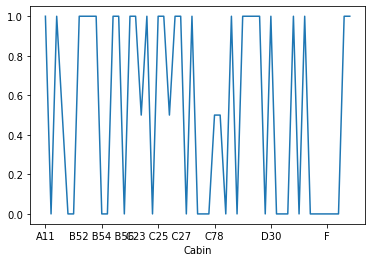

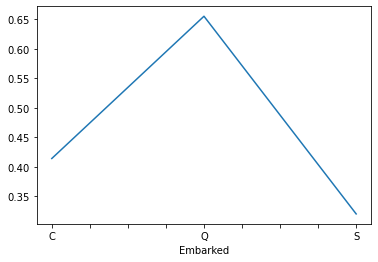

In [14]:
for i in ['Cabin' , 'Embarked']:
    X_train.groupby([i])['Survived'].mean().plot()
    plt.show()

In [16]:
X_train.head()

,Cabin,Embarked,Survived
109,F,S,0
176,NaN,S,1
366,NaN,C,0
407,C80,C,0
280,NaN,S,1


In [17]:
### Finding probability for survived 

val = X_train.groupby(['Embarked'])['Survived'].mean()

In [18]:
val

Embarked
C    0.414286
Q    0.655172
S    0.320442
Name: Survived, dtype: float64

In [19]:
val1 = pd.DataFrame(val)

In [20]:
val1

,Survived
Embarked,
C,0.414286
Q,0.655172
S,0.320442


In [21]:
X_train['Survived'].unique()

array([0, 1], dtype=int64)

In [28]:
# The above values are positive data points . 

In [52]:
val1['Dead'] = 1 - val1['Survived']

In [53]:
val1

,Survived,Dead
Embarked,,
C,0.414286,0.585714
Q,0.655172,0.344828
S,0.320442,0.679558


In [22]:
0.414286 + 0.585714

1.0

For finding the ratio of probability 

In [54]:
val1['Ratio'] = val1['Survived'] / val1['Dead']

In [55]:
val1

,Survived,Dead,Ratio
Embarked,,,
C,0.414286,0.585714,0.707317
Q,0.655172,0.344828,1.900000
S,0.320442,0.679558,0.471545


In [56]:
c = val1['Ratio'].to_dict()

In [57]:
c

{'C': 0.7073170731707319, 'Q': 1.9, 'S': 0.47154471544715454}

In [58]:
X_train['Embarked'] = X_train['Embarked'].map(c)

<ipython-input-58-29ed561d8dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Embarked'] = X_train['Embarked'].map(c)


In [59]:
X_train.head()

,Cabin,Embarked,Survived
109,F,0.471545,0
176,n,0.471545,1
366,n,0.707317,0
407,C,0.707317,0
280,n,0.471545,1


## Using Feature-Engine 

In [96]:
from feature_engine.encoding import PRatioEncoder

In [97]:
reg = PRatioEncoder(encoding_method = 'ratio' , variables=['Embarked'])

In [98]:
reg.fit(X_train , y_train)

PRatioEncoder(variables=['Embarked'])

In [99]:
reg.encoder_dict_

{'Embarked': {'C': 0.7073170731707319, 'Q': 1.9, 'S': 0.47154471544715454}}

In [100]:
reg.variables_

['Embarked']

In [101]:
reg.n_features_in_

3

In [102]:
X_train = reg.transform(X_train)

In [103]:
X_train.head()

,Cabin,Embarked,Survived
109,F,0.471545,0
176,n,0.471545,1
366,n,0.707317,0
407,C,0.707317,0
280,n,0.471545,1
